# Linear Regression with Tensorflow

Objective: simple demo to create linear regression model with Tensorflow

In [45]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#Tensorflow is built as a computation graph composed of a set of nodes. Each node represents an operation:

g = tf.Graph()

with g.as_default():
    
    #placeholder allows to create temporary slot for the dataset that will be fed into the graph
    x = tf.placeholder(dtype=tf.float32, shape=(None), name='x')
    
    #variables are different from placeholders as they are initialized directly
    w = tf.Variable(2.0, name='weight')
    b = tf.Variable(0.7, name='bias')
    z = w*x + b
    
    init = tf.global_variables_initializer()

In [5]:
with tf.Session(graph=g) as sess:
    
    #initialize w and b:
    sess.run(init)
    
    #evaluate z:
    for t in [1.0, 0.6, -1.8]:
        print('x=%4.1f --> z=%4.1f'%(t, sess.run(z, feed_dict={x:t})))

x= 1.0 --> z= 2.7
x= 0.6 --> z= 1.9
x=-1.8 --> z=-2.9


In this case we created a placeholder without a shape argument. Therefore, it can be fed data with any shape. Let's rerun the graph with different data.

In [7]:
with tf.Session(graph=g) as sess:
    sess.run(init)
    print(sess.run(z, feed_dict={x:[1., 2., 3.]}))

[2.7 4.7 6.7]


Next, let's use Tensorflow methods to calculate sum and mean of arrays

In [8]:
p = tf.Graph()

In [9]:
with p.as_default():
    #Creating placeholder with shape None for the first dimension - this allows to pass arrays of any dim for dim1
    x = tf.placeholder(dtype=tf.float32, shape=(None, 2,3), name='input_x')
    x2 = tf.reshape(x, shape=(-1, 6), name='x2')
    
    #Calculating the sum of each column:
    xsum = tf.reduce_sum(x2, axis=0, name='col_sum')
    
    #Calculating the mean of each column:
    xmean = tf.reduce_mean(x2, axis=0, name='col_mean')

In [10]:
with tf.Session(graph=p) as sess:
    x_array = np.arange(18).reshape(3,2,3)
    #Reshaping inputs so they can be passed into the graph p placeholder for x
    print('input shape: ', x_array.shape)
    print('Reshaped: \n', sess.run(x2, feed_dict={x:x_array}))
    
    #Running the sum and mean methods
    print('Columns Sums: \n', sess.run(xsum, feed_dict={x:x_array}))
    print('Columns Mean: \n', sess.run(xmean, feed_dict={x:x_array}))

input shape:  (3, 2, 3)
Reshaped: 
 [[ 0.  1.  2.  3.  4.  5.]
 [ 6.  7.  8.  9. 10. 11.]
 [12. 13. 14. 15. 16. 17.]]
Columns Sums: 
 [18. 21. 24. 27. 30. 33.]
Columns Mean: 
 [ 6.  7.  8.  9. 10. 11.]


Now on to Linear Regression

In [12]:
import random

In [20]:
#Creating toy dataset:
X_train = np.arange(100).reshape((100, 1))
#Crearing randomly increasing line for y
y_train =  np.array([i + random.uniform(-1,1) for i in range(0,100)])

In [31]:
class TfLinreg(object):
    
    def __init__(self, x_dim, learning_rate=0.01, random_seed=None):
        self.x_dim = x_dim
        self.learning_rate = learning_rate
        self.g = tf.Graph()
        #Building model:
        with self.g.as_default():
            ##set graph level random seed:
            tf.set_random_seed(random_seed)
            
            self.build()
            ##Create initializer:
            self.init_op = tf.global_variables_initializer()
            
    def build(self):
        ##Define placeholders for inputs:
        self.X = tf.placeholder(dtype = tf.float32, shape = (None, self.x_dim), name = 'x_input')
        self.y = tf.placeholder(dtype = tf.float32, shape= (None), name= 'y_input')
        
        print(self.X)
        print(self.y)
        ##Define weight matrix and bias vector
        w = tf.Variable(tf.zeros(shape=(1)), name='weight')
        b = tf.Variable(tf.zeros(shape=(1)), name='bias')
        
        print(w)
        print(b)
        
        #Create z by multiplying w and x
        self.z_net = tf.squeeze(w*self.X + b, name='z_net')
        print(self.z_net)
        #Calculating the square of the errors
        sqr_errors = tf.square(self.y - self.z_net, name='sqr_errors')
        print(sqr_errors)
        #Calculating the mean of the square of the errors
        self.mean_cost = tf.reduce_mean(sqr_errors, name='mean_cost')
        
        #Initializing the optimizer with Gradient Descent
        optimizer = tf.train.GradientDescentOptimizer(learning_rate = self.learning_rate, name = 'GradientDescent')
        #Minimizing the mean squared cost with the optimizer
        self.optimizer = optimizer.minimize(self.mean_cost)

In [32]:
#Initializing the model:
lrmodel = TfLinreg(x_dim=X_train.shape[1], learning_rate=0.01)

Tensor("x_input:0", shape=(?, 1), dtype=float32)
Tensor("y_input:0", dtype=float32)
<tf.Variable 'weight:0' shape=(1,) dtype=float32_ref>
<tf.Variable 'bias:0' shape=(1,) dtype=float32_ref>
Tensor("z_net:0", dtype=float32)
Tensor("sqr_errors:0", dtype=float32)


In [41]:
#Creating function to train the model:
def train_linreg(sess, model, X_train, y_train, num_epochs=15):
    #Initialize all variables W and b:
    sess.run(model.init_op)
    
    training_costs = []
    for i in range(num_epochs):
        _, cost = sess.run([model.optimizer, model.mean_cost], feed_dict={model.X:X_train, model.y:y_train})
        training_costs.append(cost)
        
    return training_costs

In [42]:
sess = tf.Session(graph=lrmodel.g)

In [43]:
training_costs = train_linreg(sess, lrmodel, X_train, y_train)

In [44]:
training_costs

[3285.299,
 13744876.0,
 57510478000.0,
 240631850000000.0,
 1.0068369e+18,
 4.2127448e+21,
 1.7626716e+25,
 7.375262e+28,
 3.0859128e+32,
 1.291189e+36,
 inf,
 inf,
 inf,
 inf,
 inf]

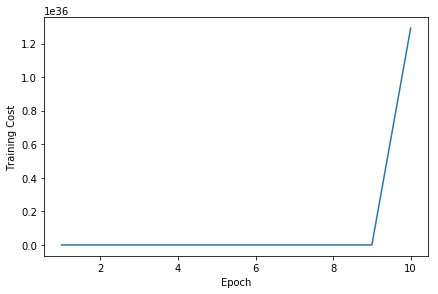

In [46]:
#Visualizing Model Convergence:
plt.plot(range(1, len(training_costs) + 1), training_costs)
plt.tight_layout()
plt.xlabel('Epoch')
plt.ylabel('Training Cost')
plt.show()

The model above is not converging

In [47]:
#Function to create array of predictions:
def predict_linreg(sess, model, X_test):
    y_pred = sess.run(model.z_net, feed_dict={model.X:X_test})
    return y_pred

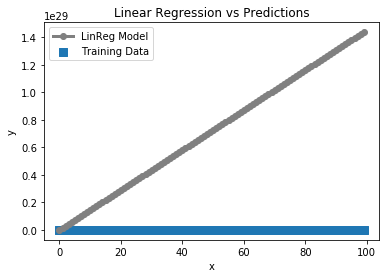

In [50]:
#Drawing predictions vs actual values:
plt.scatter(X_train, y_train, marker='s', s=50, label='Training Data')
plt.plot(range(X_train.shape[0]),
        predict_linreg(sess, lrmodel, X_train), 
        color='gray', marker='o', markersize=6, linewidth=3, 
        label='LinReg Model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title("Linear Regression vs Predictions")
plt.show()

This model is clearly not working. Let's try creating a new one and changing hyperparameters

In [51]:
#Initializing the model:
lrmodel_2 = TfLinreg(x_dim=X_train.shape[1], learning_rate=0.0001)

Tensor("x_input:0", shape=(?, 1), dtype=float32)
Tensor("y_input:0", dtype=float32)
<tf.Variable 'weight:0' shape=(1,) dtype=float32_ref>
<tf.Variable 'bias:0' shape=(1,) dtype=float32_ref>
Tensor("z_net:0", dtype=float32)
Tensor("sqr_errors:0", dtype=float32)


In [52]:
sess = tf.Session(graph=lrmodel_2.g)

In [54]:
training_costs_2 = train_linreg(sess, lrmodel_2, X_train, y_train)

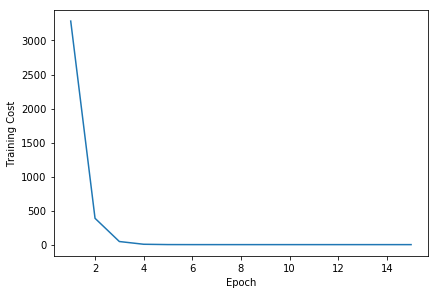

In [55]:
#Visualizing Model Convergence:
plt.plot(range(1, len(training_costs_2) + 1), training_costs_2)
plt.tight_layout()
plt.xlabel('Epoch')
plt.ylabel('Training Cost')
plt.show()

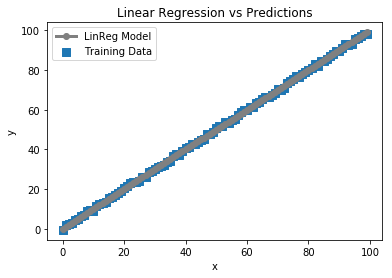

In [56]:
#Drawing predictions vs actual values:
plt.scatter(X_train, y_train, marker='s', s=50, label='Training Data')
plt.plot(range(X_train.shape[0]),
        predict_linreg(sess, lrmodel_2, X_train), 
        color='gray', marker='o', markersize=6, linewidth=3, 
        label='LinReg Model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title("Linear Regression vs Predictions")
plt.show()

Much better! The learning rate hyperparameter had initially been set to a value too high for convergence